# Classify whether patient is a liver disease patient using decision tree classifier in Python
_________

This work is part of a collection of practice sets called [Machine Learning Starters](https://github.com/jamiemorales/project-machine-learning-starters).
It aims to help someone get started fast and gain a high-level understanding of the fundamental steps in the machine learning lifecycle early on.
After completion, someone will have built intuition over the machine learning lifecycle. 

## Step 0: Understand the problem
What we're trying to do here is to classify whether someone is a liver disease patient or not.

## Step 1: Set-up and understand data
This step helps uncover issues that we will want to address in the next step and take into account when building and evaluating our model. We also want to find interesting relationships or patterns that we can possibly leverage in solving the problem we specified.

In [3]:
# Set-up libraries needed
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [4]:
# Read-in data
df = pd.read_csv('../00-Datasets/liver.csv')

In [7]:
# Look at some details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
# Look at some records in data
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [9]:
# Check for missing values
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

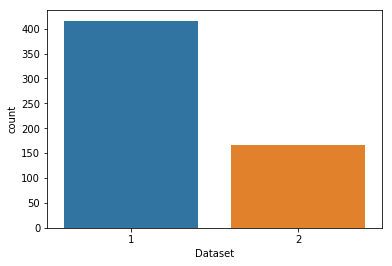

In [12]:
# Look at breakdown of label
df.Dataset.value_counts()
sns.countplot(df.Dataset)

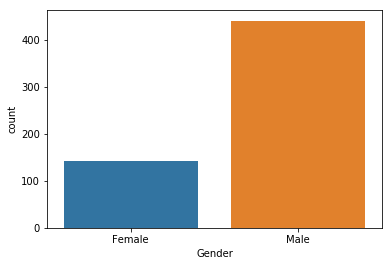

In [13]:
# Look at breakdown of categorical features
df.Gender.value_counts()
sns.countplot(df.Gender)

In [14]:
# Summarise data
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


## Step 2: Preprocess data and understand some more
This step typically takes the most time in the cycle but for our purposes, most of the datasets chosen in this series are clean. 
	
Real-world datasets are noisy and incomplete. The choices we make in this step to address data issues can impact downstream steps and the result itself. For example, it can be tricky to address missing data when we don't know why it's missing. Is it missing completely at random or not? It can also be tricky to address outliers if we do not understand the domain and problem context enough.

In [30]:
# Remove records with missing values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 582
Data columns (total 11 columns):
Age                           579 non-null int64
Gender                        579 non-null int64
Total_Bilirubin               579 non-null float64
Direct_Bilirubin              579 non-null float64
Alkaline_Phosphotase          579 non-null int64
Alamine_Aminotransferase      579 non-null int64
Aspartate_Aminotransferase    579 non-null int64
Total_Protiens                579 non-null float64
Albumin                       579 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       579 non-null int64
dtypes: float64(5), int64(6)
memory usage: 54.3 KB


In [20]:
# Transform categorical feature(s) to numeric
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)

In [22]:
# Explore correlations to label
df.corr().Dataset.sort_values(ascending=False)

Dataset                       1.000000
Albumin_and_Globulin_Ratio    0.163131
Albumin                       0.161388
Total_Protiens                0.035008
Gender                       -0.082416
Age                          -0.137351
Aspartate_Aminotransferase   -0.151934
Alamine_Aminotransferase     -0.163416
Alkaline_Phosphotase         -0.184866
Total_Bilirubin              -0.220208
Direct_Bilirubin             -0.246046
Name: Dataset, dtype: float64

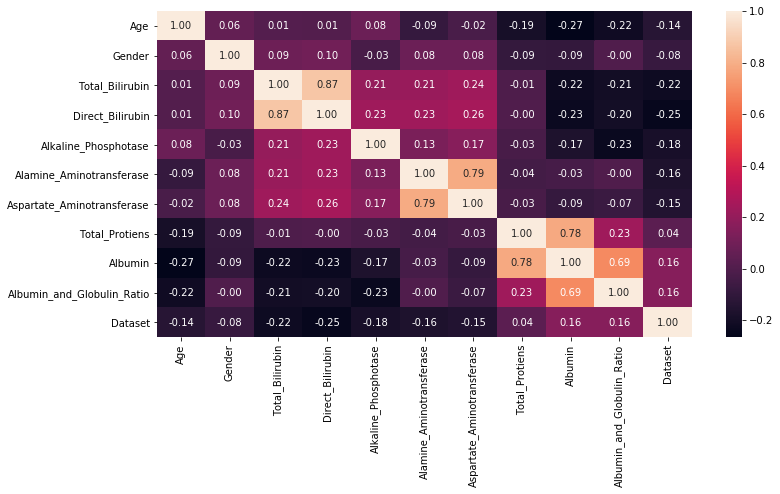

In [23]:
# Explore correlations visually
f, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [39]:
# Split data into 80% train and 20% validation
X = df.drop('Dataset', axis=1)
y = df['Dataset']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

## Step 3: Model and evaluate
This last step is three-fold.

We create the model and fit the model to the data we prepared for training.
	
We then proceed to classifying with the data we prepared for validation.
	
Lastly, we evaluate the model's performance with mainstream classification metrics. 

In [32]:
# Build and train model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
# Apply model to validation data
y_predict = model.predict(X_val)

In [38]:
# Compare actual and predicted values
actual_vs_predict = pd.DataFrame({'Actual': y_val,
                                'Prediction': y_predict})
actual_vs_predict.sample(12)

,Actual,Prediction
501,1,1
486,1,2
90,1,1
396,1,1
358,1,2
170,1,1
412,1,1
75,2,2
499,1,1
505,1,1


In [37]:
# Evaluate model
print('Classification metrics: \n', classification_report(y_val, y_predict))

Classification metrics: 
               precision    recall  f1-score   support

           1       0.75      0.79      0.77        82
           2       0.41      0.35      0.38        34

    accuracy                           0.66       116
   macro avg       0.58      0.57      0.58       116
weighted avg       0.65      0.66      0.66       116



## More

If you found this work interesting, you might like:

* Machine Learning Starters

* Deep Learning Starters

* Natural Language Processing Starters

You can find more at [github.com/jamiemorales](https://github.com/jamiemorales).

Datasets are not mine. List of sources: [datasets and sources](https://github.com/jamiemorales/project-machine-learning-starters/blob/master/00-Datasets/Data%20sources.txt)

For sharing this work, here's how / the license: https://creativecommons.org/licenses/by-sa/4.0/